<img width="600" src="http://linux.ria.ua/img/articles/numberplate_detection/nomeroff_net.png" alt="Nomeroff Net. Automatic numberplate recognition system"/>


## The example demonstrates license plate mask recognition.

In [1]:
# Import all necessary libraries.
import sys
import os
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
# Load default configuration file.
with open('../config/default.json') as data_file:
    config = json.load(data_file)
    
sys.path.append(os.path.abspath(config["NOMEROFF_NET"]["ROOT"]))

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters

In [4]:
# Initialize the detector with default configuration file.
nnet = Detector(config)

In [5]:
# Load weights in keras format.
nnet.loadModel()

Using TensorFlow backend.


The nnet.detect method is passed an array of image paths that are processed simultaneously. If you have a GPU, change the IMAGES_PER_GPU parameter in the [configuration file](https://github.com/ria-com/nomeroff-net/blob/master/docs/CONFIG.md/ "More about the configuration file...") and pass the specified number of images to the function, this will significantly increase the recognition speed.
More about the returned detect method object [here]().

/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


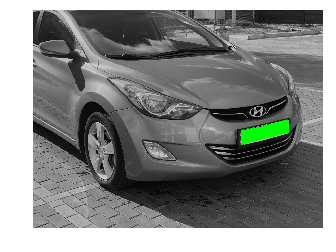

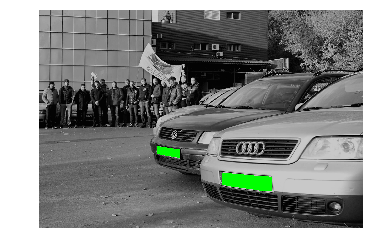

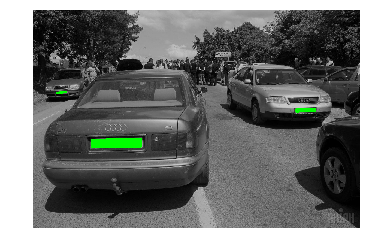

In [6]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        
        np = nnet.detect([img])
    
        # Generate splashs.
        splashs = filters.color_splash(img, np)
        for splash in splashs:
            plt.imshow(splash)
            plt.axis("off")
            plt.show()